In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [3]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [4]:
df_adult = rcr('adult.csv')
p(df_adult)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
pd.options.display.max_info_columns = 999
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
list(df_adult.race.unique())

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

education=["Bachelor's", "Less than Bachelor's","Master's","PhD","Professional"]
salary = [110000,105000,126000,144200,95967]

df = pd.DataFrame({"Education":education,
                  "Salary":salary})
df

,Education,Salary
0,Bachelor's,110000
1,Less than Bachelor's,105000
2,Master's,126000
3,PhD,144200
4,Professional,95967


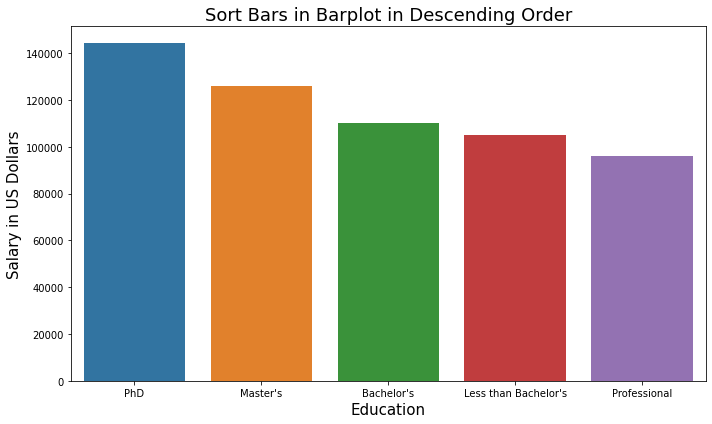

In [8]:
plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='Education', 
            y="Salary", 
            data=df, 
            order=df.sort_values('Salary',ascending = False).Education)
# set labels
plt.xlabel("Education", size=15)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Sort Bars in Barplot in Descending Order", size=18)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_descending_order_Seaborn_Python.png", dpi=100)

In [10]:
df_adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='fnlwgt', 
            y="income", 
            data=df_adult, 
            order=df_adult.sort_values('income',ascending = False).Education)
# set labels
plt.xlabel("Education", size=15)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Sort Bars in Barplot in Descending Order", size=18)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_descending_order_Seaborn_Python.png", dpi=100)

#https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

KeyError: 'income'

<Figure size 720x432 with 0 Axes>

## 3.6 Summary<a id='3.6_Summary'></a>